In [506]:
import pandas as pd
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/lkchemposer/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'mod']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [507]:
ktc = pd.read_excel('../Downloads/EB model 2019.03.05 CH4 CO2.xls', sheet_name=['model', 'Sheet1', 'CONC'], header=None)
mod, xyz, conc = ktc['model'], ktc['Sheet1'], ktc['CONC']

In [508]:
# preprocessing
conc.columns = conc.iloc[0, :].str.strip()
conc.drop(0, inplace=True)
conc = conc.astype(float)

In [509]:
# change dtype of k
mod.drop([0, len(mod) - 1], inplace=True)
mod.iloc[:, :3] = mod.iloc[:, :3].astype(float)

In [510]:
# split reactions into reactants and products
rxn = mod[3].str.split('==>', expand=True)
rxn[0], rxn[1] = rxn[0].str.strip(), rxn[1].str.strip()
rxn.columns = [3, 4]
rxn = mod.iloc[:, :3].join(rxn)
rxn.columns = ['A', 'Ea/R', 'C', 'reacs', 'prods']

In [511]:
# sort concs by cations, anions, and neutrals
cats = conc.columns[conc.columns.str.contains('\+')]
ans = conc.columns[conc.columns.str.contains('-')]
neuts = conc.columns[1:][~(conc.columns[1:].str.contains('\+') | conc.columns[1:].str.contains('-'))]

s_cats = conc[cats].apply(lambda i: i.sort_values(ascending=False).index, axis=1, result_type='expand')
sc_cats = pd.DataFrame(-np.sort(-conc[cats]))

s_ans = conc[ans].apply(lambda i: i.sort_values(ascending=False).index, axis=1, result_type='expand')
sc_ans = pd.DataFrame(-np.sort(-conc[ans]))

s_neuts = conc[neuts].apply(lambda i: i.sort_values(ascending=False).index, axis=1, result_type='expand')
sc_neuts = pd.DataFrame(-np.sort(-conc[neuts]))

## Cations

In [7]:
# cation with highest conc
s_cats[0].value_counts()

C4H3+     43
C3H8+      9
CH2OH+     2
CO(a)+     1
HOCO+      1
Name: 0, dtype: int64

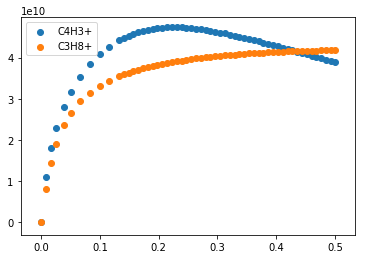

In [45]:
plt.scatter(conc['Time(s)'], conc['C4H3+'])
plt.scatter(conc['Time(s)'], conc['C3H8+'])
plt.legend()

In [9]:
# reactions producing C4H3+, sorted by k
rxn[rxn['prods'].str.contains('C4H3\+')].sort_values(by='A', ascending=False)

,A,Ea/R,C,reacs,prods
154,9.500000e-09,0.0,0.0,C2H2+ + C2H2,H + C4H3+
414,7.100000e-09,0.0,0.0,C2H4 + C2H+,H2 + C4H3+
525,6.843493e-09,0.0,0.0,CH3+ + C3H2,H2 + C4H3+
522,4.193317e-09,0.0,0.0,C2H4+ + C3H2,CH3 + C4H3+
391,3.750000e-09,0.0,0.0,C2H4 + C4H+,C2H2 + C4H3+
664,2.600000e-09,0.0,0.0,C4H2 + H3+,H2 + C4H3+
155,2.400000e-09,0.0,0.0,C2H3+ + C2H2,H2 + C4H3+
715,2.000000e-09,0.0,0.0,C4H3 + H+,H + C4H3+
221,2.000000e-09,0.0,0.0,C3H5+ + C,H2 + C4H3+
389,1.500000e-09,0.0,0.0,C2H4 + C3H2+,CH3 + C4H3+


In [153]:
# species important to production of C4H3+ sorted by sum of k
a = rxn[rxn['prods'].str.contains('C4H3\+')]
b = a['reacs'].str.split(' \+ ', expand=True).stack().reset_index(1)
c = a.iloc[:, :3].join(b.iloc[:, 1]).rename(columns={0: 'reacs'})
c.groupby('reacs')['A'].agg([np.sum, 'count']).sort_values(by='sum', ascending=False)

,sum,count
reacs,,
C2H4,1.235000e-08,3
C2H2,1.190000e-08,2
C3H2,1.103681e-08,2
C2H2+,1.003000e-08,2
C2H+,7.100000e-09,1
CH3+,6.843493e-09,1
C4H2,6.080000e-09,5
C2H4+,4.658313e-09,2
C4H+,3.750000e-09,1


In [11]:
# reactions consuming C4H3+
rxn[rxn['reacs'].str.contains('C4H3\+')]

,A,Ea/R,C,reacs,prods
500,4.800000e-10,0.0,0.0,C3H4 + C4H3+,C2H2 + C5H5+
673,7.510000e-08,0.0,0.0,C- + C4H3+,C + H + C4H2
674,7.510000e-08,0.0,0.0,H- + C4H3+,H + H + C4H2
1244,7.500000e-08,0.0,0.0,O- + C4H3+,H + O + C4H2
1264,7.500000e-08,0.0,0.0,OH- + C4H3+,H + OH + C4H2


In [17]:
# reactions producing C3H8+
rxn[rxn['prods'].str.contains('C3H8\+')].sort_values(by='A', ascending=False)

,A,Ea/R,C,reacs,prods
794,1.000000e-10,0.0,0.0,H2 + C3H7+,C3H8+ + H
460,2.530000e-12,0.0,0.0,C2H6 + C2H6+,CH4 + C3H8+


In [18]:
# reactions consuming C3H8+
rxn[rxn['reacs'].str.contains('C3H8\+')]

,A,Ea/R,C,reacs,prods
303,1.500000e-07,0.0,0.0,et- + C3H8+,C3H6 + H2


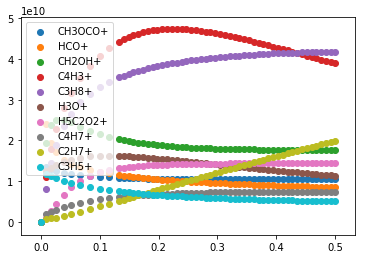

In [59]:
# top 10 cations by conc
for i in s_cats.iloc[:, :10].stack().value_counts()[:10].index:
    plt.scatter(conc['Time(s)'], conc[i])
    
plt.legend()

In [336]:
rxn[rxn['reacs'].str.contains('C2H7\+')]

,A,Ea/R,C,reacs,prods
287,1.500000e-07,0.0,0.0,et- + C2H7+,H2 + C2H5
288,1.500000e-07,0.0,0.0,et- + C2H7+,H + C2H6
766,1.000000e-07,0.0,0.0,C2H7+ + H-,C2H6 + H + H
1666,1.000000e-07,0.0,0.0,C2H7+ + OH-,C2H6 + H + OH


## Anions

In [28]:
s_ans[1].value_counts()

CH2CHO-    43
OH-        12
C2H-        1
Name: 1, dtype: int64

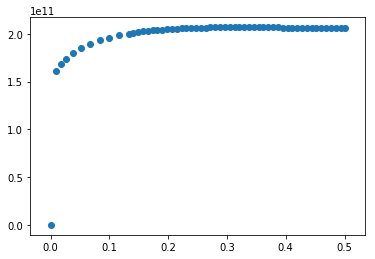

In [27]:
plt.scatter(conc['Time(s)'], conc['et-'])

In [60]:
# reactions producing et-
rxn[rxn['prods'].str.contains('et-')].sort_values(by='A', ascending=False)

,A,Ea/R,C,reacs,prods
25,2.460000e+09,0.0,0.0,eh-,et-
1573,1.000000e-08,0.0,0.0,HOCO- + CH3,CH3OH + CO + et-
1270,1.400000e-09,0.0,0.0,OH- + H,H2O + et-
1220,1.400000e-09,0.0,0.0,H- + O2,HOO + et-
338,1.300000e-09,0.0,0.0,H- + H,H2 + et-
1592,1.000000e-09,0.0,0.0,CH3O- + H,CH3OH + et-
1352,1.000000e-09,0.0,0.0,CH3O- + C2,H2CO + C2H + et-
1219,1.000000e-09,0.0,0.0,H- + HCO,H2CO + et-
1335,1.000000e-09,0.0,0.0,HCCO- + O,HCO + CO + et-
1336,1.000000e-09,0.0,0.0,HCCO- + HOO,O2 + CH2CO + et-


In [152]:
# species important to production of et- sorted by sum of k
a = rxn[rxn['prods'].str.contains('et-')]
b = a['reacs'].str.split(' \+ ', expand=True).stack().reset_index(1)
c = a.iloc[:, :3].join(b.iloc[:, 1]).rename(columns={0: 'reacs'})
c.groupby('reacs')['A'].agg([np.sum, 'count']).sort_values(by='sum', ascending=False)

,sum,count
reacs,,
eh-,2.460000e+09,1
CH3,1.200000e-08,3
HOCO-,1.100000e-08,2
H-,1.092000e-08,13
H,9.800000e-09,11
C2,4.000000e-09,4
CH3O-,4.000000e-09,4
O-,3.740000e-09,9
C-,3.597100e-09,10


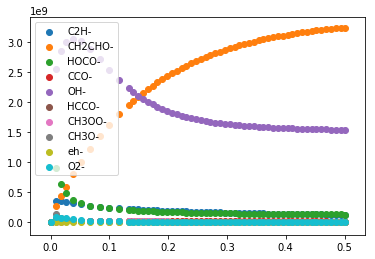

In [73]:
# top 10 anions by conc (excluding et-)
for i in s_ans.iloc[:, 1:10].stack().value_counts()[:10].index:
    plt.scatter(conc['Time(s)'], conc[i])
    
plt.legend()

In [280]:
rxn[rxn['prods'].str.contains('CH2CHO-')].sort_values(by='A', ascending=False)

,A,Ea/R,C,reacs,prods
1337,1.000000e-09,0.0,0.0,HCCO- + H2,CH2CHO-
1342,1.000000e-09,0.0,0.0,HCCO- + CH2OH,CH2CHO- + HCO
1343,1.000000e-09,0.0,0.0,HCCO- + H2CO,CH2CHO- + CO


In [281]:
rxn[rxn['prods'].str.contains('HCCO-')].sort_values(by='A', ascending=False)

,A,Ea/R,C,reacs,prods
1349,1.000000e-09,0.0,0.0,HOCO- + C2H3,CH3O + HCCO-
1350,1.000000e-09,0.0,0.0,HOCO- + C2H2,H2CO + HCCO-
1356,1.000000e-09,0.0,0.0,CH3O- + C2,HCCO- + CH2
865,1.000000e-10,0.0,0.0,CH3- + CO2,HCCO- + H2O
1626,1.000000e-10,0.0,0.0,CH2CHO- + HCCO,HCCO- + CH3CO


## Neutrals

In [339]:
s_neuts['Time'] = conc['Time(s)']

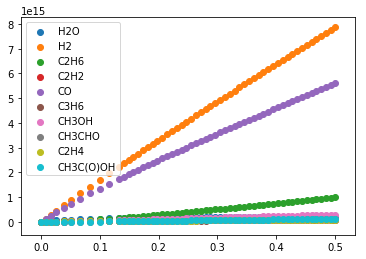

In [79]:
# top 10 neutrals by conc (excluding CO2 and CH4)
for i in s_neuts.iloc[:, 2:12].stack().value_counts()[:10].index:
    plt.scatter(conc['Time(s)'], conc[i])
    
plt.legend()

## Reactions

In [457]:
# typo
rxn.loc[rxn['reacs'] == 'CH2CO+ +2H2O', 'reacs'] = 'CH2CO+ + 2H2O'

In [459]:
a = rxn['prods'].str.split(' \+ ', expand=True).stack().reset_index(1)
a.loc[a[0].str.startswith('2'), 0] = a.loc[a[0].str.startswith('2'), 0].str.lstrip('2')
a.columns = [0, 'prods']
b = rxn['reacs'].str.split(' \+ ', expand=True).stack().reset_index(1)
b.loc[b[0].str.startswith('2'), 0] = b.loc[b[0].str.startswith('2'), 0].str.lstrip('2')
b.columns = [0, 'reacs']
c = b[['reacs']].join(a[['prods']])

In [462]:
# unique sources and sinks for each species
sources = c.groupby('prods')['reacs'].apply(lambda i: [len(set(i)), set(i)]).apply(pd.Series)
sources.columns = ['src_count', 'sources']
sinks = c.groupby('reacs')['prods'].apply(lambda i: [len(set(i)), set(i)]).apply(pd.Series)
sinks.columns = ['snk_count', 'sinks']
ss = sources.join(sinks, how='outer')
ss['src_count'].fillna(0, inplace=True)
ss['snk_count'].fillna(0, inplace=True)
ss['net_src'] = ss['src_count'] - ss['snk_count']
ss

,src_count,sources,snk_count,sinks,net_src
(CH2COH2O)+,2.0,"{H2O, CH2CO+}",1.0,{CH3C(O)OH},1.0
C,64.0,"{CH3OCH3, HCO+, CH+, C5H+, H2CO+, C4H3, C4, C2...",48.0,"{HCO+, CH+, C5, C4H3, C4, C2H3+, C4H+, CCO, CH...",16.0
C+,16.0,"{CH2, H+, CH+, C3H, CO+, C2H2+, C2H+, O2+, H, ...",45.0,"{HCO+, CH+, C5H+, C2H5OH+, C2H3+, C4H+, CH4, C...",-29.0
C-,2.0,"{et-, C}",22.0,"{CO2, C4H2, C2H3, et-, C2H2, C5H2, O, O-, H, C...",-20.0
C2,23.0,"{C4, C2H3+, CCO, C4+, et-, C3, CH2CO+, C2H2+, ...",32.0,"{CH+, C4H3, C4, CH4, CO2, C4H, C3, H+, et-, C2...",-9.0
C2+,12.0,"{H+, CH+, H2+, CO+, CH, C2H, C+, H2O+, O+, C2,...",25.0,"{HCO+, CH+, C4H+, C3, H+, C2H2, C2H2+, H, CH2+...",-13.0
C2H,45.0,"{CH+, C4H3, C2H3+, HCCO+, CH4, OH-, C4H2, et-,...",46.0,"{C5, C4, C2H3+, CCO, CH4, CO2, C3H3, C4H2, C3,...",-1.0
C2H+,28.0,"{HCO+, CH+, H2CO+, CH4, H+, C2H2, CH2+, CH5+, ...",26.0,"{HCO+, CH+, C3, H+, C2H2, C4H2+, CH2CO+, C2H2+...",2.0
C2H-,5.0,"{et-, C2H2, CH3O-, C2H, C2}",2.0,"{et-, C2H2}",3.0
C2H2,69.0,"{CH-, C3H5, CH3OCH3, HCCCHOH+, CH+, C4H3, C2H3...",40.0,"{C3H5, C4H5, C5H+, C2H3+, C4H+, CH4, CO2, C3H3...",29.0


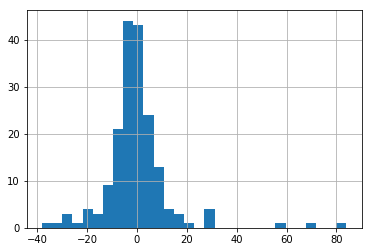

In [463]:
ss['net_src'].hist(bins=30)

In [539]:
ts = ['H', 'C2H4'] # choose species to add tracers
ps = rxn['prods'].str.split(' \+ ', expand=True).stack().reset_index(1)
ps.loc[ps[0].str.startswith('2'), 0] = ps.loc[ps[0].str.startswith('2'), 0].str.lstrip('2')
inds = ps[ps[0].isin(ts)].index

cp = mod.iloc[:, :4].copy()
cp.loc[inds, 3] = cp.loc[inds, 3].str.cat([' + T{}'.format(i) for i in inds])
cp.to_excel('./tracer_{}.xlsx'.format(str(ts)), sheet_name='model', header=['A', 'T^m', 'Ea', 'Reactions'], index=False)

In [ ]:
d = {'C': 4, 'H': 1, 'O': 6}

In [541]:
neuts_r = ['C', 'C2', 'C2H3', 'C2H5', 'C2H6']

Index(['C', 'C2', 'C2H2', 'C2H3', 'C2H4', 'C2H5', 'C2H6', 'CH', 'CH2',
       'CH2(a)', 'CH2CO', 'CH2OH', 'CH3', 'CH3CHO', 'CH3CO', 'CH3O', 'CH3OO',
       'CH4', 'CO', 'CO2', 'H', 'H2', 'H2CO', 'H2O', 'HCCO', 'HCO', 'HCOOH',
       'HOCO', 'HOO', 'O', 'O(1D)', 'O2', 'O3', 'OH', 'C3H8', 'C3', 'C2H',
       'CCO', 'C3H', 'C3H2', 'C3H3', 'C3H4', 'C4H2', 'CH3OH', 'C5', 'C4',
       'H2O2', 'C3H5', 'HCOOCH3', 'C4H3', 'H3', 'C5H2', 'CH3CH2OH', 'CH3OCH3',
       'C4H', 'C3H2O', 'H2C3O', 'HCCCHO', 'C3O', 'CH3OOH', 'C5H', 'C3H6',
       'CH3C(O)OH', 'C3H7', 'C4H4', 'C5O', 'C6H6', 'CH3CH2CHO', 'CH3COCH3',
       'C4H6', 'C4H5', 'C4H8', 'C4H10', 'C4H9', 'COOH', 'C5H10', 'C6H5',
       'C2H5COCH3', 'C5H12', '(CH2OH)2', 'CO(a)'],
      dtype='object', name=0)

In [545]:
neuts[62].replace('')

'CH3C(O)OH'